In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np

data=np.load('/content/drive/My Drive/Cat&Dogs_data/data.npy')
target=np.load('/content/drive/My Drive/Cat&Dogs_data/target.npy')

#loading the save numpy arrays in the previous code

### Convolutional Neural Network Architecture

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 256)       2560      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       295040    
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [0]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

### Training the CNN for 10 epochs using train data 

In [0]:
history=model.fit(data,target,epochs=20,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 19956 samples, validate on 4990 samples
Epoch 1/20





19956/19956 [==============================] - 20s 1ms/step - loss: 0.6580 - acc: 0.5990 - val_loss: 0.5894 - val_acc: 0.6818
Epoch 2/20
19956/19956 [==============================] - 6s 311us/step - loss: 0.5740 - acc: 0.6979 - val_loss: 0.5692 - val_acc: 0.7048
Epoch 3/20
19956/19956 [==============================] - 6s 309us/step - loss: 0.5126 - acc: 0.7478 - val_loss: 0.4968 - val_acc: 0.7571
Epoch 4/20
19956/19956 [==============================] - 6s 313us/step - loss: 0.4667 - acc: 0.7775 - val_loss: 0.4845 - val_acc: 0.7663
Epoch 5/20
19956/19956 [==============================] - 6s 312us/step - loss: 0.4332 - acc: 0.7958 - val_loss: 0.4830 - val_acc: 0.7778
Epoch 6/20
19956/19956 [==============================] - 6s 310us/step - loss: 0.4011 - acc: 0.8146 - val_loss: 0.4673 - val_acc: 0.7786
Epoch 7/20
19956/19956

### Visualizing the loss and the accuracy of trained CNN

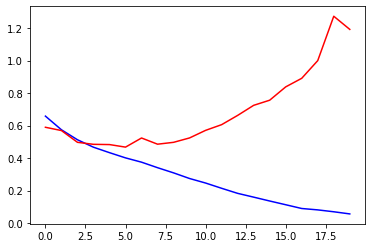

In [0]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

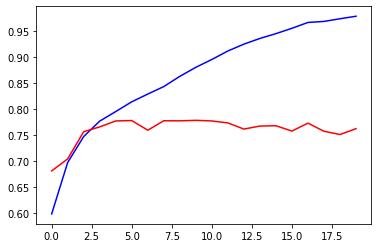

In [0]:
plt.plot(history.history['acc'],'b')
plt.plot(history.history['val_acc'],'r')
#if not working replace 'accuracy' with 'acc'

### Evaluating the CNN using testing_data

This returns the loss and the accuracy of the Neural Network for Testing data

In [8]:
print(model.evaluate(test_data,test_target))

2495/2495 [==============================] - 12s 5ms/step
[0.6932449480813586, 0.48216432846619756]


In [0]:
model.save_weights('cats&dogs_v1.h5')